### _Imports_

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.linear_model  import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pylab as plt

import functions as fn # importing pre-defined functions from .py file (inside notebooks folder)

### Upload diamonds train data from csv

In [2]:
diamonds_train = pd.read_csv('../data/diamonds_train.csv')
diamonds_train.head()

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


**Remark**: For the diamonds dataset, we have conducted an exploratory data analysis (EDA) in advance. Find references [here](https://github.com/Kristinawk/EDA_Diamonds).  
  
This dataset doesn't have nulls, therefore we can proceed directly with encoding.

## 1. Encoding

### Categorical variables overview

In [3]:
cat_var_lst = ["city", "cut", "color", "clarity"]
#cat_var_overview = fn.cat_var(diamonds_train, cat_var_lst)
#cat_var_overview

### One hot encoding

In [4]:
baseline_train = fn.one_hot_encod(diamonds_train, cat_var_lst)

In [5]:
#baseline_train.head()

Checking that all features are numeric

In [6]:
#baseline_train.info()

## 2. Features selection and engineering

In this phase we will not apply any changes to the features.

### Save pre-processing to csv

In [7]:
#baseline_train.to_csv('../data/baseline_train.csv', index=False)

## 3. Model selection

In [8]:
y = baseline_train['price'].astype('float64').to_numpy()
X = baseline_train[[col for col in baseline_train.columns if col != 'price']].to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
#print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

## 3. a) ElasticNet

In [13]:
model_elasticnet = ElasticNet()

fn.cross_val(model_elasticnet, X, y)

Cross val. scores: [-1833.64390701 -1937.89311616 -1838.94606472 -1834.4722746
 -1803.07991273] 

Mean of scores: 1849.6070550429442 



## 3. b) SVR

In [16]:
model_svr = SVR()

fn.cross_val(model_svr, X, y)

Cross val. scores: [-4208.27630307 -4349.59084525 -4258.49970513 -4225.98461454
 -4222.88255361] 

Mean of scores: 4253.046804323332 



## 3. c) Ridge

In [17]:
model_ridge = Ridge()

fn.cross_val(model_ridge, X, y)

Cross val. scores: [-1162.37097317 -1236.84771998 -1181.36659532 -1123.77678443
 -1086.81019334] 

Mean of scores: 1158.2344532457496 



## 3. d) Decision Tree Regressor

In [20]:
model_decisiontree = DecisionTreeRegressor()

fn.cross_val(model_decisiontree, X, y)

Cross val. scores: [-877.62931559 -872.70115246 -907.36536323 -858.23774212 -845.13098535] 

Mean of scores: 872.2129117503431 



## 3. e) RandomForestRegressor

In [48]:
model_randomforest = RandomForestRegressor()

fn.cross_val(model_randomforest, X, y)

Cross val. scores: [-654.95224026 -662.57559913 -670.01148258 -665.67893135 -651.56808185] 

Mean of scores: 660.9572670347252 



## 3. f) GradientBoostingRegressor

In [23]:
model_gradientboosting = GradientBoostingRegressor()

fn.cross_val(model_gradientboosting, X, y)

Cross val. scores: [-879.59064277 -856.04185565 -889.98164808 -869.74512933 -827.06412632] 

Mean of scores: 864.484680430803 



## 3. g) ExtraTreesRegressor

In [26]:
model_extratrees = ExtraTreesRegressor()

fn.cross_val(model_extratrees, X, y)

Cross val. scores: [-613.81259552 -619.0077115  -614.08969898 -620.04012503 -598.93489935] 

Mean of scores: 613.1770060765838 



## 3. h) BaggingRegressor

In [28]:
model_bagging = BaggingRegressor()

fn.cross_val(model_bagging, X, y)

Cross val. scores: [-691.21925102 -708.19306603 -713.79584737 -700.17574779 -678.97964718] 

Mean of scores: 698.4727118796867 



## 3. i) AdaBoostRegressor

In [31]:
model_adaboost = AdaBoostRegressor()

fn.cross_val(model_adaboost, X, y)

Cross val. scores: [-1599.44833947 -1511.38562057 -1520.56161739 -1555.29603015
 -1547.01533228] 

Mean of scores: 1546.7413879698531 



## 3. j) XGBRegressor

In [13]:
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

In [15]:
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

604.736944806901


## 3. k) KNeighborsRegressor

In [17]:
model_kneighbors = KNeighborsRegressor(n_neighbors=5)

fn.cross_val(model_kneighbors, X, y)

Cross val. scores: [-1163.55810032 -1159.10035929 -1201.77515276 -1189.10705478
 -1121.14549699] 

Mean of scores: 1166.9372328271334 



## 3. l) StackingRegressor

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2, random_state = 42)

In [14]:
# Define RidgeCV model with multiple alphas
meta_model = RidgeCV(alphas=[0.1, 1, 10, 100, 1000], store_cv_values=True)

# Fit the model
meta_model.fit(X_train, y_train)

# Check the best alpha
print(f"Best alpha: {meta_model.alpha_}")

# You can check the performance for each alpha on the training set
print(f"Training score for the best model: {meta_model.score(X_train, y_train)}")

Best alpha: 10.0
Training score for the best model: 0.9201359601471992


C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [15]:
# Define base models
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")),
    ('lr', ExtraTreesRegressor(n_estimators=100, random_state=42))
]

# Define meta-model
meta_model = RidgeCV(alphas=10)

#    ('gb', GradientBoostingRegressor(n_estimators=100)),

stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

In [13]:
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('lr', ExtraTreesRegressor(random_state=42))],
                  final_estimator=Ridge())

In [14]:
y_pred = stacking_regressor.predict(X_test)

In [15]:
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

570.6051095290945


In [34]:
import sklearn
print(sklearn.__version__)

1.6.1


In [10]:
#pip install --upgrade scikit-learn

In [11]:
#import xgboost
#print(xgboost.__version__)

In [12]:
#pip install --upgrade xgboost

In [13]:
#pip install mlxtend

In [14]:
#pip install --upgrade mlxtend

In [16]:
fn.cross_val(stacking_regressor, X, y)

Cross val. scores: [-575.7573974  -578.66893273 -576.53971381 -592.67181053 -568.79008359] 

Mean of scores: 578.4855876116168 



In [15]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.5.2

**CONCLUSION**: Stacking Regressor provides the best metrics: RMSE 606 in test dataset and 603 in Kaggle.

### Grid Search: XGBRegressor

In [39]:
model_xgb = XGBRegressor()

In [40]:
param_grid = {'n_estimators': [175],  # Number of trees in the forest.
              'max_depth': [None],  # Maximum depth of the trees.
              'max_features': [None]  # Number of features to consider when looking for the best split.
              }

In [41]:
grid_search = GridSearchCV(model_xgb,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

In [42]:
grid_search.fit(X, y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Best hyperparameters:  {'max_depth': None, 'max_features': None, 'n_estimators': 175} 

Best score:  602.2453763809503 



### Grid Search: ExtraTreesRegressor

In [62]:
param_grid = {'n_estimators': [100],  # Number of trees in the forest.
              'max_depth': [None],  # Maximum depth of the trees.
              'min_samples_split': [6],  # Minimum number of samples required to split an internal node.
              'min_samples_leaf': [2],  # Minimum number of samples required to be at a leaf node.
              'max_features': [None]  # Number of features to consider when looking for the best split.
              }

In [63]:
grid_search = GridSearchCV(model_extratrees,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

In [64]:
grid_search.fit(X, y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Best hyperparameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100} 

Best score:  606.4497365477694 



### Fit Model

In [43]:
model_xgb = XGBRegressor(n_estimators=175, max_depth=None, max_features=None)

In [44]:
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

### Visual check

In [45]:
check = pd.DataFrame({'Ground truth': y_test, 'Predictions': y_pred, 'Diff': y_test - y_pred})
check

,Ground truth,Predictions,Diff
0,2970.0,2740.718994,229.281006
1,3004.0,2329.899902,674.100098
2,838.0,897.678772,-59.678772
3,6468.0,6264.114258,203.885742
4,633.0,655.591125,-22.591125
...,...,...,...
8086,4764.0,4711.311035,52.688965
8087,756.0,749.421570,6.578430
8088,2690.0,3089.295898,-399.295898
8089,3992.0,3847.788086,144.211914


In [46]:
check.reset_index(inplace=True)

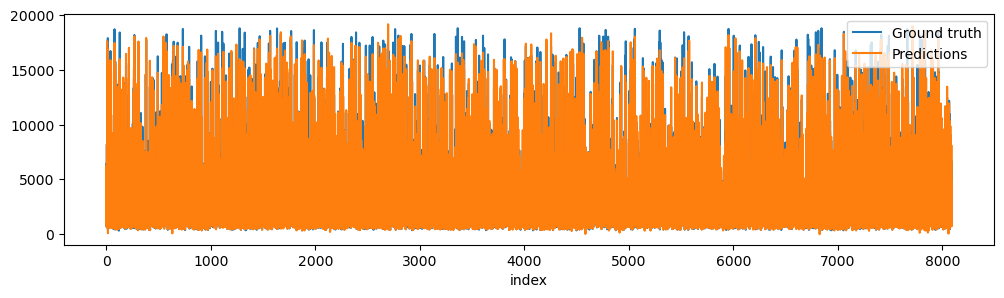

In [47]:
check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(12, 3));

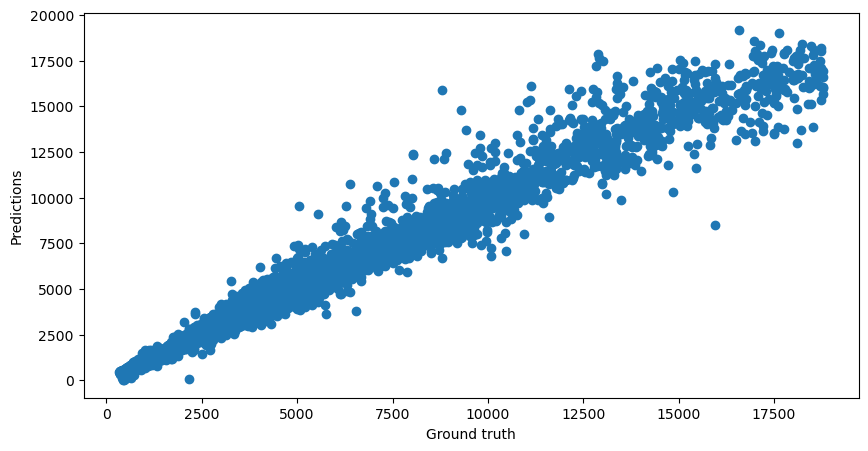

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.scatter(y_test, y_pred)
ax.set_xlabel('Ground truth')
ax.set_ylabel('Predictions')
#ax.set_title('')
plt.show()

# 4. Predictions

### Upload diamonds test data from csv

In [49]:
diamonds_test = pd.read_csv('../data/diamonds_test.csv')
#diamonds_test.head()

### One-hot-encoding

In [50]:
baseline_test = fn.one_hot_encod(diamonds_test, cat_var_lst)

In [51]:
baseline_test = baseline_test.drop('id', axis=1)

In [52]:
#baseline_test.head()

### Scalling

In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(baseline_test)

### Predict: StackingRegressor

In [54]:
model_xgb_pred = model_xgb.predict(scaled_data)

In [55]:
model_xgb_pred

array([  598.89087,  2001.6273 , 11339.613  , ...,   625.15967,
         744.37573,   680.7252 ], shape=(13485,), dtype=float32)

### Save

In [57]:
fn.save_pred(diamonds_test, model_xgb_pred, 'encod01_featu00_model04')

'file saved succesfully'